# A Classical Least Squares Method for Quantitative Spectral Analysis with Python

__Abstract__. This method, also known as Beer’s method, can be used to estimate the concentration of different components in an unknown spectrum. First, the physical context and Lambert-Beer’s law will be introduced, followed by the Classical Least Squares theoretical approach and derivation of the Normal equations. To wrap up, a Python implementation will be used to present an application example on how to calculate the concentration of different components on a sample spectrum.

### Introduction

Spectroscopy is the study of emitted, reflected or scattered light by a solid, liquid or gas, as a function of wavelength [1]. Most spectroscopy methods are therefore classified as absorption, emission or scattering spectroscopy. Some examples are Absorption, X-Ray, Infrared and Raman spectroscopy among others.

Sometimes, the substance under spectroscopic study is unknown. If knowing the composition of such substance is required, its measured spectrum (query spectrum) can be compared against a spectral library of known substances (components) in order to be identified. To do so, the unknown spectrum is searched using a search algorithm which computes a score based on a similarity metric, providing a list of nearest matches or concentrations. A similarity metric is a function that quantifies the similarity between two objects. In some sense, such measures are the inverse of distance metrics: they return a large value for similar objects and either zero or negative value for dissimilar objects. When normalized, similarities range between 1 (complete similarity, meaning that the objects are equal) and 0 (no similarity at all). Similarity metrics are also the very basic building block for other activities such as Recommendation systems, clustering, classification or anomaly detection.
Regarding spectroscopy, there are several standard spectral search algorithms [2] based on different similarity metrics [3]. In the following, the Classical Least Squares method will be used to identify the spectrum of an unknown substance and to obtain the concentrations of known substances in a mixture. This approach is also known as Direct Least Squares, K-matrix calibration algorithm, or Beer’s method, since it is based on Beer-Lambert’s law.

### Physical context and Classical Least Squares - Beer’s Method

The Beer-Lambert law relates the attenuation of light to the properties of the material through which the light is traveling. It is commonly applied to physical and chemical analysis measurements and used in understanding light attenuation in physical optics. The Beer-Lambert law says that at any given wavelength i, the light absorbance (A) is proportional to the absorbance coefficient of the pure substance (k) at the chosen wavelength i and the concentration of the pure substance (c):
$$A_i = k_i c $$

where the absorbance coefficient $(k_i = a_i L)$ is the product of the the path length of the light through the material (L) and the molar attenuation coefficient or absorptivity (a) of the pure substance at the chosen wavelength i, which is a molecular property constituting the ‘spectrum’ of such molecule.

The equation $A_i = k_i c $ applies to a single pure substance or component in a sample. When there are multiple absorbing components, the total absorbance at any wavelength is the sum of the absorbances, at that wavelength, of all the components in the mixture:
$$ A_i = \sum_{j}^n k_{ij} c_j $$

If what we have recorded is not a single value A for a given wavelength i, but a whole absorbance spectrum with w points, this is better represented with matrix notation:


$$
\begin{bmatrix}
A_1 \\
A_2 \\
\cdots \\
A_i \\
\cdots \\
A_w
\end{bmatrix}
=
\begin{bmatrix}
k_{11} c_1 + \cdots + k_{1j} c_j + \cdots + k_{1n} c_n\\
k_{21} c_1 + \cdots + k_{2j} c_j + \cdots + k_{2n} c_n\\
\cdots\\
k_{i1} c_1 + \cdots + k_{ij} c_j + \cdots + k_{in} c_n\\
\cdots\\
k_{w1} c_1 + \cdots + k_{wj} c_j + \cdots + k_{wn} c_n\\
\end{bmatrix}
$$

or in a more compact manner as

$$ A = Kc $$

where

$$
A = 
\begin{bmatrix}
A_1 \\
A_2 \\
\cdots \\
A_i \\
\cdots \\
A_w
\end{bmatrix}
, \quad K =  
\begin{bmatrix}
k_{11} & k_{12} & \cdots & k_{1j} & \cdots & k_{1n} \\
k_{21} & k_{22} & \cdots & k_{2j} & \cdots & k_{2n} \\
\vdots & \vdots & \ddots & \cdots & \cdots & \cdots\\
k_{i1} & k_{i2} & \cdots & k_{ij} & \cdots & k_{in} \\
\vdots & \vdots & \ddots & \cdots & \cdots & \cdots\\
k_{w1} & k_{w2} & \cdots & k_{wj} & \cdots & k_{wn} \\
\end{bmatrix}
,\quad c = 
\begin{bmatrix}
c_1 \\
c_2 \\
\cdots \\
c_j \\
\cdots \\
c_n
\end{bmatrix}
$$

so A is our recorded absorbance spectrum (also called query spectrum, or unknown spectrum, since we do not know yet what does it contain), K is the matrix of the pure component spectra (where the spectra values of such components are arranged in columns), and c is a vector with the concentration of the n pure substances.


Therefore, having the values of our measured unknown spectra, $A_i$, and knowing the ones of the pure components spectra making up the mixture, $k_{ij}$, we can find the concentrations $c_i$ that best determine the mixture absorbance $A$. However, because the measured spectrum and the pure substances spectra contain noise, there will be, in general, no exact solution for the equation $A = Kc$. But we can still find c such that the product $Kc$ is as close as possible to $A$, as measured by the euclidean norm:

$$ \begin{Vmatrix}
A - Kc
\end{Vmatrix}_2^2 $$

In other words, we want to find c such that the sum of the squares of the errors A-Kc is minimized. The errors are defined as the difference between the measured spectra A and the spectra calculated by multiplying K and c. c will be then the best least squares solution for equation A = Kc.

Using the fact that

$$ \begin{Vmatrix}
x
\end{Vmatrix}_2^2 
= x^Tx$$

The Euclidean norm of our error is

$$ \begin{Vmatrix}
A - Kc
\end{Vmatrix}_2^2 
= (A - Kc)^T(A - Kc) = c^TK^TKc - 2A^TKc + A^TA
$$

In order to find the minimum of such function, we just need to derive it, set the resulting expression equal to zero and solve for c. To do so, we will make use of the property

$$\nabla_x(x^TMx) = 2Mx $$

where x is a vector and M is a symmetric matrix [4].

So,

$$ \nabla_x(c^TK^TKc - 2A^TKc + A^TA) = 2K^TKc - 2K^TA $$

Setting this expression to 0 we obtain the Normal Equations:
$$ 2K^TKc = 2K^TA $$

which can be solved to finally obtain the similarity scores between the measured spectrum and the known spectra in the library, or what its the same, the concentrations of pure substances in the unknown mixture:

$$ c = (K^TK)^{-1}K^TA$$

Note that the second derivative of the squared sum of A-Kc is a positive semidefinite matrix, implying that the solution c is the global minimum (and not a maximum or a saddle point).

More detailed information on this method can be found in the book Chemometric techniques for quantitative analysis [5] or the spectroscopyonline webpage column about CLS [6].

### Code and example implemented with Python

First, the Python packages that will be needed are loaded:

In [12]:
# Loading the required packages:

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

The least squares formula to obtain the concentration of pure substances in the unknown mixture is defined as:

In [13]:
# Classical Least Squares formula: Similarity vector calculation

def least_sq(sample_spectrum, components): #takes in two arguments (unknown spectrum, known spectrum)
    
    # Sample_spectrum (unknown spectrum): array of w values.
    # Components (known spectra): array of n (number of components) columns with w values.
    # This def returns an array of n values. Each value is the similarity score for the sample_spectrum and a component spectrum.

    similarity = np.dot(inv(np.dot(components, components.T)) , np.dot(components, sample_spectrum)) 
    #the calculated value for c such that he sum of square of errors |A-Kc| is minimum
    
    return similarity

These spectra will be composed of Gaussian peaks. Therefore Gaussian function is defined:


In [14]:
# Gaussian function

def Gauss(x, mu, sigma, intensity = 1):
    
    # x is an array
    # mu is the expected value or mean
    # sigma is the square root of the variance or standard deviation
    # intensity is a multiplication factor
    # This def returns the Gaussian function of x
    
    gaussian = intensity/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2) #probability density function for gaussian distribution
    
    return gaussian

and use it to create three different components:

In [15]:
# Fabrication of our data:

# X-axis (Wavelengths)
x_range =  np.linspace(100, 200, 1000) #min:100, max:200, no. of divisions: 1000

# Let's create three different components. These components will constitute of K-matrix (known spectrum)

# Component A
mu_a1 = 120 #mean
sigma_a1 = 2 #standard deviation
intensity_a1 = 1 #intensty

mu_a2 = 185
sigma_a2 = 2
intensity_a2 = 0.2

gauss_a =  Gauss(x_range, mu_a1, sigma_a1, intensity_a1) + Gauss(x_range, mu_a2, sigma_a2, intensity_a2) 

# Component B
mu_b = 150
sigma_b = 15
intensity_b = 1
gauss_b = Gauss(x_range, mu_b, sigma_b, intensity_b)

# Component C
mu_c1 = 110
sigma_c1 = 2
intensity_c1 = 0.05

mu_c2 = 160
sigma_c2 = 10
intensity_c2 = 1

gauss_c = Gauss(x_range, mu_c1, sigma_c1, intensity_c1) + Gauss(x_range, mu_c2, sigma_c2, intensity_c2)

# Component normalization i.e. changing all component to a common unit scale
component_a = gauss_a/np.max(gauss_a) 
component_b = gauss_b/np.max(gauss_b)
component_c = gauss_c/np.max(gauss_c)


This result in the next three different components:

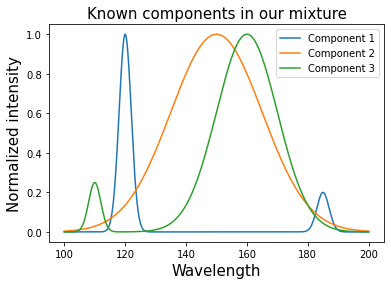

In [16]:
# How do they look?
plt.plot(x_range, component_a, label = 'Component 1')
plt.plot(x_range, component_b, label = 'Component 2')
plt.plot(x_range, component_c, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

These three spectra will make our component matrix or K-matrix, where the spectra are arranged in rows.

In order to generate a query spectrum, the three components will be multiplied by a concentration and summed up together. To make it a bit more real, some noise will be added.

In [17]:
# What concentrations we want these components to have in our mixture: (unknown component)
c_a = 0.5
c_b = 0.3
c_c = 0.2

# Let's build the spectrum to be studied: The mixture spectrum  
query_spectra = c_a * component_a + c_b * component_b + c_c *component_c

# Let's add some noise for a bit of realism:
query_spectra = query_spectra +  np.random.normal(0, 0.02, len(x_range))

The resulting mixture spectrum looks like:

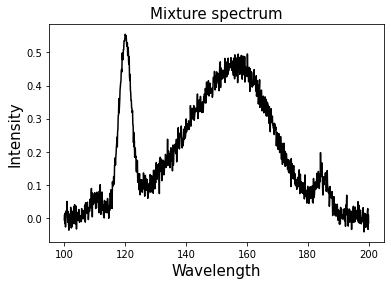

In [18]:
# How does it look?
plt.plot(x_range, query_spectra, color = 'black', label = 'Mixture spectrum with noise')
plt.title('Mixture spectrum', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.show()

Our query spectrum is composed of three known components (n=3). Therefore, for this example the system of equations in matrix form looks like:

$$
\begin{bmatrix}
A_1 \\
A_2 \\
\cdots \\
%A_i \\
%\cdots \\
A_w
\end{bmatrix}
= 
\begin{bmatrix}
k_{11} c_1 + k_{12} c_2 + k_{13} c_3\\
k_{21} c_1 + k_{22} c_2 + k_{23} c_3\\
... \\
%k_{i1} c_1 + k_{i2} c_2 + k_{i3} c_3\\
%... \\
k_{w1} c_1 + k_{w2} c_2 + k_{w3} c_3\\
\end{bmatrix}
=
\begin{bmatrix}
k_{11} & k_{12} & k_{13} \\
k_{21} & k_{22} & k_{23} \\
\vdots & \vdots & \vdots\\
%k_{i1} & k_{i2} & k_{i3} \\
%\vdots & \vdots & \vdots\\
k_{w1} & k_{w2} & k_{w3} \\
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2 \\
c_3 \\
\end{bmatrix}
$$


where w = 1000 for this case (the wavelength axis has 1000 values). So A is a vector composed of 1000 values, c is a vector composed of 3 values (the three component concentrations) and K is a 3x1000 matrix.

Knowing A and K it is possible now to recalculate the 3 components concentration in the ‘unknown’ mixture:

In [19]:
# Generate the components matrix or K matrix
components = np.array([component_a, component_b, component_c])

# Apply Least squares
cs = least_sq(query_spectra, components)

# And print the result:
print('The expected concentrations for components A, B and C are: ' + str(cs))


The expected concentrations for components A, B and C are: [0.50142081 0.29891131 0.20071466]


and plot both the original data and the result for the shake of comparison:

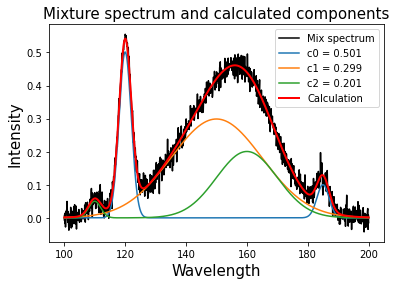

In [20]:
# Does the result match the original data?

# Plot the original data:
plt.plot(x_range, query_spectra, color = 'black', label = 'Mix spectrum' )

# Plot the separate components times its calculated concentration:
for i in np.arange(len(cs)):
    plt.plot(x_range, cs[i]*components[i], label = 'c' + str(i)+ ' = ' + str(np.round(cs[i], 3)))

# Plot the result: the sum of separate components times its calculated concentration:
plt.plot(x_range, np.dot(cs,components), color = 'red', linewidth = 2, label = 'Calculation')
    
plt.title('Mixture spectrum and calculated components', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.legend()
plt.show()

The calculated concentrations, shown in the legend of the figure, perfectly agree with the set values.
Note that the mixture spectra were not normalized. In case that the mixture spectra was normalized, the inverse of such normalization constant should be applied to the obtained concentrations in order to have the right values.